In [13]:
import tweepy 
import pandas as pd
import os
import nltk
import re
import csv
import matplotlib.pyplot as plt

In [3]:
    #giving the keys for the twitter
    consumer_key= 'N7xQegAcB5YfqDpCEIfGH1AHk'
    consumer_secret= 'KKdSgKDhtiVX0BNfaGSQHUFRpnmwHrqbrmLZ3r1PvFlKahXMCy'
    access_token= '325164119-ItLrMjOpPvSQgqVjozBZWDhgtlh8fNq32DXTBsdJ'
    access_token_secret= '7S9KJt58i8qYlUOYMuzCiufNferW9f5iZIOybifM9PKLe'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
#Setting the keywords
hashtag=["Altcoin","Coindesk","Cryptocurrency","Gold","APPL","GOOG","Bitcoin","YHOO"]

In [6]:
#cleaning the data
def cleantext(tw):
    cleanedtext = re.sub(r"http\S+", "", tw)
    cleanedtext = re.sub('@[^\s]+',"", cleanedtext)
    cleanedtext = re.sub(r"[^a-zA-Z0-9]+", ' ', cleanedtext)
    return cleanedtext

In [7]:
# Open/Create a file to append data
for j in hashtag:
    csvFile = open(j+'.csv', 'a')
    #Use csv Writer
    with open(j+'.csv', 'w', newline='') as outcsv:
        writer = csv.DictWriter(outcsv, fieldnames = ["tweet_id", "Posted time", "User ID", "Tweet text"])
        writer.writeheader()
        csvWriter = csv.writer(csvFile)

    for tweet in tweepy.Cursor(api.search,q="#"+j + " -filter:retweets",count=100,
                           lang="en",
                           since="2020-02-19",tweet_mode='extended').items():
        new_text=cleantext(tweet.full_text)
        csvWriter.writerow([tweet.id,tweet.created_at,tweet.user.id, new_text])

date
2020-02-19    325
2020-02-20    334
2020-02-21    297
2020-02-22    201
2020-02-23    238
2020-02-24    250
2020-02-25    255
2020-02-26    248
2020-02-27      3
Name: tweet_id, dtype: int64
date
2020-02-19    189
2020-02-20    195
2020-02-21    151
2020-02-22    114
2020-02-23    119
2020-02-24    143
2020-02-25    129
2020-02-26    143
2020-02-27      1
Name: User ID, dtype: int64


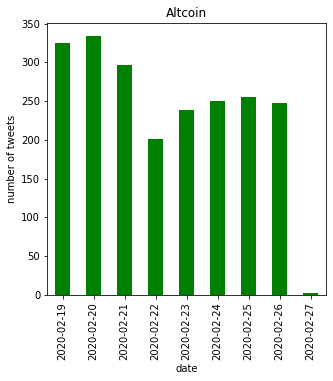

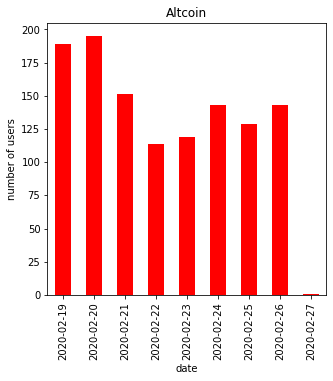

date
2020-02-19    77
2020-02-20    81
2020-02-21    72
2020-02-22    53
2020-02-23    51
2020-02-24    75
2020-02-25    77
2020-02-26    78
2020-02-27     1
Name: tweet_id, dtype: int64
date
2020-02-19     7
2020-02-20     9
2020-02-21     8
2020-02-22     4
2020-02-23     4
2020-02-24     6
2020-02-25     7
2020-02-26    11
2020-02-27     1
Name: User ID, dtype: int64


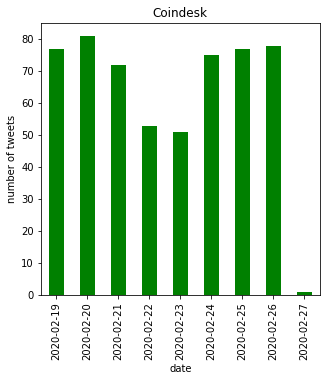

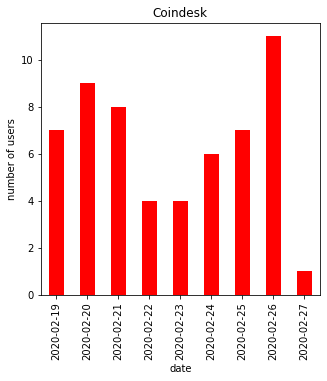

date
2020-02-19    3689
2020-02-20    3552
2020-02-21    3596
2020-02-22    2700
2020-02-23    2616
2020-02-24    3306
2020-02-25    3126
2020-02-26    3350
2020-02-27       8
Name: tweet_id, dtype: int64
date
2020-02-19    1759
2020-02-20    1599
2020-02-21    1663
2020-02-22    1291
2020-02-23    1197
2020-02-24    1540
2020-02-25    1432
2020-02-26    1536
2020-02-27       8
Name: User ID, dtype: int64


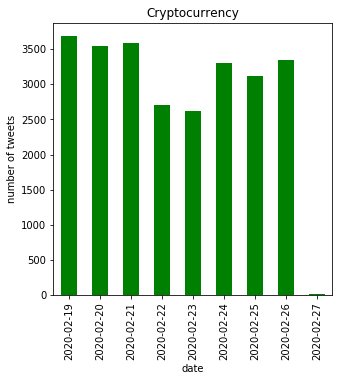

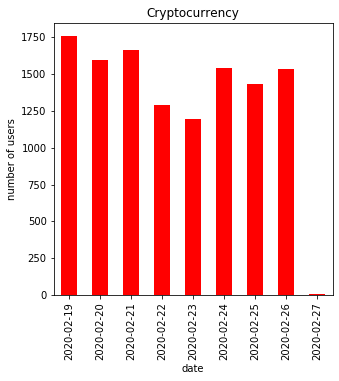

date
2020-02-19    2296
2020-02-20    2282
2020-02-21    2489
2020-02-22    1502
2020-02-23    1328
2020-02-24    2987
2020-02-25    2585
2020-02-26    2104
2020-02-27      49
Name: tweet_id, dtype: int64
date
2020-02-19    1421
2020-02-20    1373
2020-02-21    1589
2020-02-22    1060
2020-02-23     897
2020-02-24    1802
2020-02-25    1396
2020-02-26    1322
2020-02-27      45
Name: User ID, dtype: int64


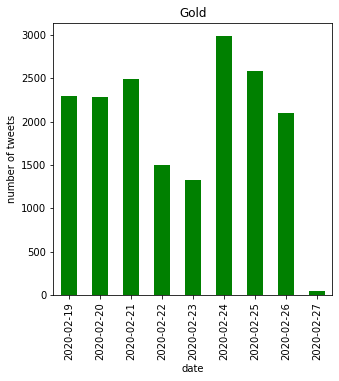

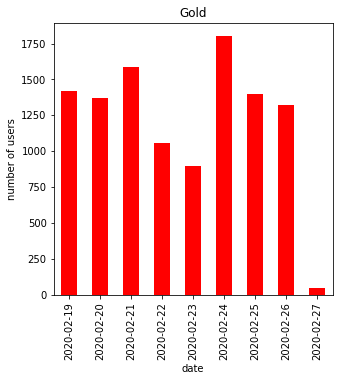

date
2020-02-19    2
2020-02-20    2
2020-02-21    3
2020-02-22    1
2020-02-23    1
2020-02-24    4
2020-02-25    2
2020-02-26    2
Name: tweet_id, dtype: int64
date
2020-02-19    2
2020-02-20    2
2020-02-21    2
2020-02-22    1
2020-02-23    1
2020-02-24    4
2020-02-25    2
2020-02-26    2
Name: User ID, dtype: int64


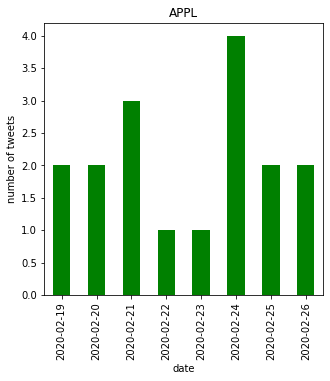

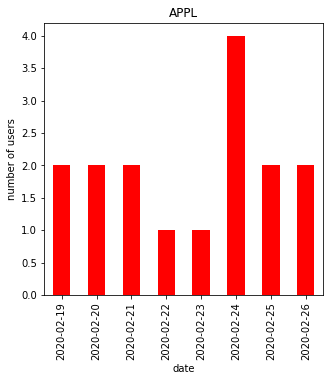

date
2020-02-19     4
2020-02-20     4
2020-02-21     9
2020-02-23     3
2020-02-24    11
2020-02-25     4
2020-02-26     3
2020-02-27     1
Name: tweet_id, dtype: int64
date
2020-02-19     4
2020-02-20     4
2020-02-21     9
2020-02-23     3
2020-02-24    11
2020-02-25     4
2020-02-26     3
2020-02-27     1
Name: User ID, dtype: int64


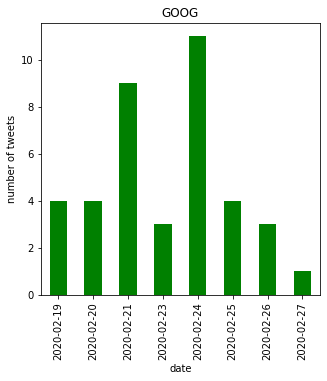

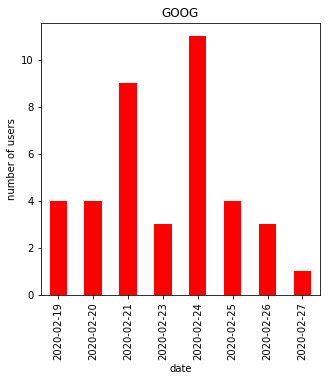

date
2020-02-19    9255
2020-02-20    8747
2020-02-21    7852
2020-02-22    6453
2020-02-23    6876
2020-02-24    8513
2020-02-25    8412
2020-02-26    9908
2020-02-27     478
Name: tweet_id, dtype: int64
date
2020-02-19    4441
2020-02-20    4008
2020-02-21    3645
2020-02-22    3059
2020-02-23    3457
2020-02-24    4169
2020-02-25    4121
2020-02-26    4637
2020-02-27     371
Name: User ID, dtype: int64


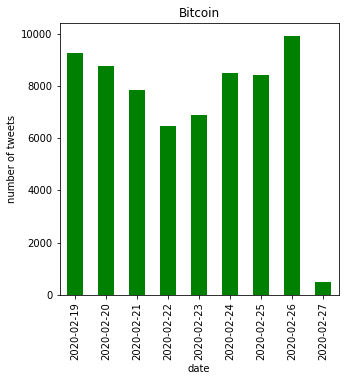

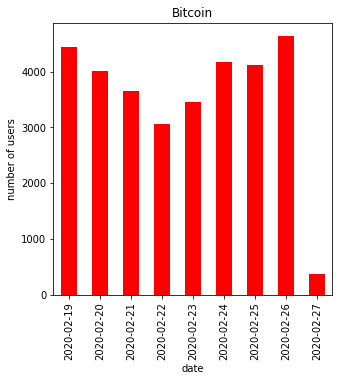

NO tweets found for #YHOO on given days


In [12]:
#fetching the data from csv to visualise using the bar graph
for stockkey in hashtag:
        df = pd.read_csv(stockkey+'.csv')
        df.head()
        if df.empty:
            print("NO tweets found for #"+stockkey+ " on given days")  
        else:
            df['year'] = pd.DatetimeIndex(df['Posted time']).year
            df['date'] = pd.DatetimeIndex(df['Posted time']).date
            df['month'] = pd.DatetimeIndex(df['Posted time']).month
            df.head()
            tweet_count=df.groupby('date')['tweet_id'].count()
            print(tweet_count)
            user_count=df.groupby('date')['User ID'].nunique()
            print(user_count)
            tweet_count.plot(kind='bar',color='green',figsize=(5,5))
            plt.title(stockkey)
            plt.xlabel('date')
            plt.ylabel('number of tweets')
            plt.show()
            user_count.plot(kind='bar',color='red',figsize=(5,5))
            plt.title(stockkey)
            plt.xlabel('date')
            plt.ylabel('number of users')
            plt.show()